#### I.  Importing, Cleaning, Preparing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/twitter-airline-sentiment/Tweets.csv')
print df.shape
print df.info()

(14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB
None


In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


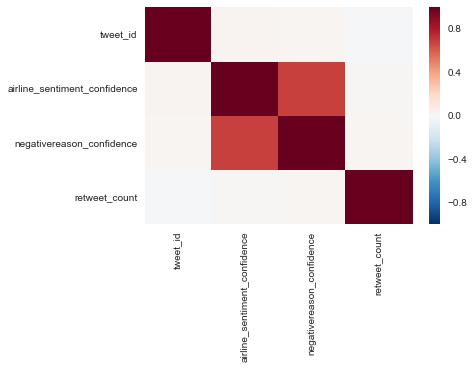

In [6]:
# Correlation Matrix

corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [7]:
# Dropping irrelevant featues for analysis

df2 = df[['airline_sentiment','negativereason','airline','retweet_count','text','tweet_created','user_timezone']]
df2.rename(columns={'airline_sentiment':'Sentiment', 'negativereason':'Negative_Reason', 'airline':'Airline', \
                    'retweet_count':'Retweet_Count', 'text':'Text', 'tweet_created':'Time_Created', \
                    'user_timezone':'User_Timezone'}, inplace=True)

df2 = df2[['Sentiment','Negative_Reason','Airline','Text','Retweet_Count','Time_Created','User_Timezone']]

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
Sentiment          14640 non-null object
Negative_Reason    9178 non-null object
Airline            14640 non-null object
Text               14640 non-null object
Retweet_Count      14640 non-null int64
Time_Created       14640 non-null object
User_Timezone      9820 non-null object
dtypes: int64(1), object(6)
memory usage: 800.7+ KB


/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Sentiment,Negative_Reason,Airline,Text,Retweet_Count,Time_Created,User_Timezone
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada)
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada)
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Central Time (US & Canada)
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada)
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada)


In [8]:
sentiment_dummies = pd.get_dummies(df2.Sentiment,drop_first=False).astype(int)
negative_reason_dummies = pd.get_dummies(df2.Negative_Reason,drop_first=False).astype(int)
airline_dummies = pd.get_dummies(df2.Airline,drop_first=False).astype(int)

df2 = pd.concat([df2,sentiment_dummies],axis=1)
df2 = pd.concat([df2,negative_reason_dummies],axis=1)
df2 = pd.concat([df2,airline_dummies],axis=1)

df2['Negative_Reason'].fillna(0, inplace=True)

df2.rename(columns={'negative':'Negative', 'neutral':'Neutral', 'positive':'Positive', 'Bad Flight':'Bad_Flight', \
                    "Can't Tell":"Can't_Tell", 'Cancelled Flight':'Cancelled_Flight', 'Customer Service Issue':\
                    'Customer_Service_Issue', 'Damaged Luggage':'Damaged_Luggage', 'Flight Attendant Complaints':\
                    'Flight_Attendant_Complaints', 'Flight Booking Problems':'Flight_Booking_Problems', 'Late Flight':\
                    'Late_Flight', 'Lost Luggage':'Lost_Luggage', 'longline':'Long_Line', 'US Airways':'US_Airways', \
                    'Virgin America':'Virgin_America'}, inplace=True)

df2.head()

,Sentiment,Negative_Reason,Airline,Text,Retweet_Count,Time_Created,User_Timezone,Negative,Neutral,Positive,Bad_Flight,Can't_Tell,Cancelled_Flight,Customer_Service_Issue,Damaged_Luggage,Flight_Attendant_Complaints,Flight_Booking_Problems,Late_Flight,Lost_Luggage,longlines,American,Delta,Southwest,US_Airways,United,Virgin_America
0,neutral,0,Virgin America,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,positive,0,Virgin America,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,neutral,0,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Central Time (US & Canada),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada),1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada),1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### II. Plotting Features and Visualizations

In [9]:
df2.Airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: Airline, dtype: int64

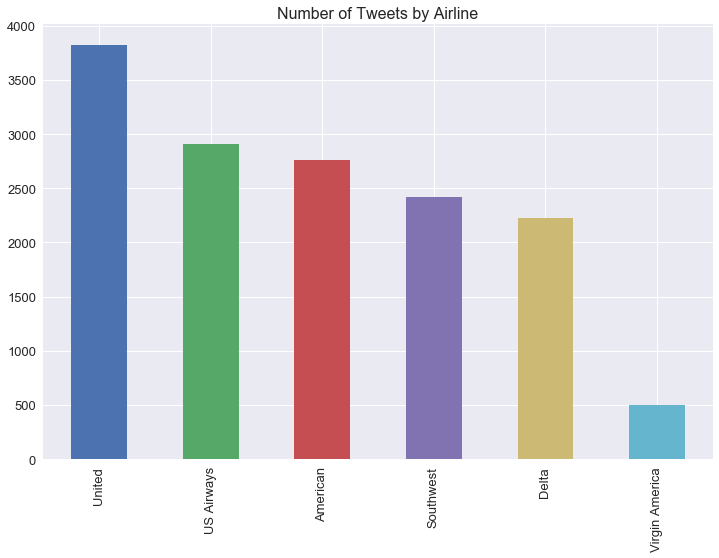

In [10]:
# Plotting By Airline

airline_counts = df2['Airline'].value_counts()

airline_counts.plot(kind = 'bar',figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Airline', fontsize=16)

In [11]:
df2.Sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: Sentiment, dtype: int64

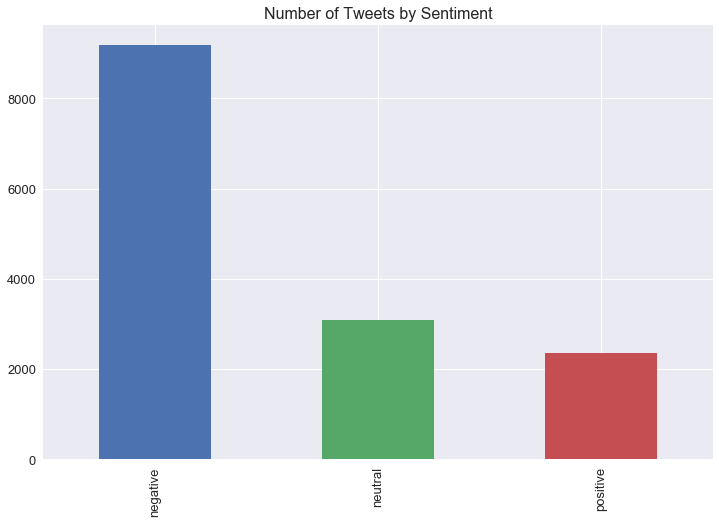

In [12]:
# Plotting By Sentiment

sentiment_counts = df2['Sentiment'].value_counts()

sentiment_counts.plot(kind = 'bar',figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Sentiment', fontsize=16)

In [13]:
df2.Negative_Reason.value_counts()

0                              5462
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: Negative_Reason, dtype: int64

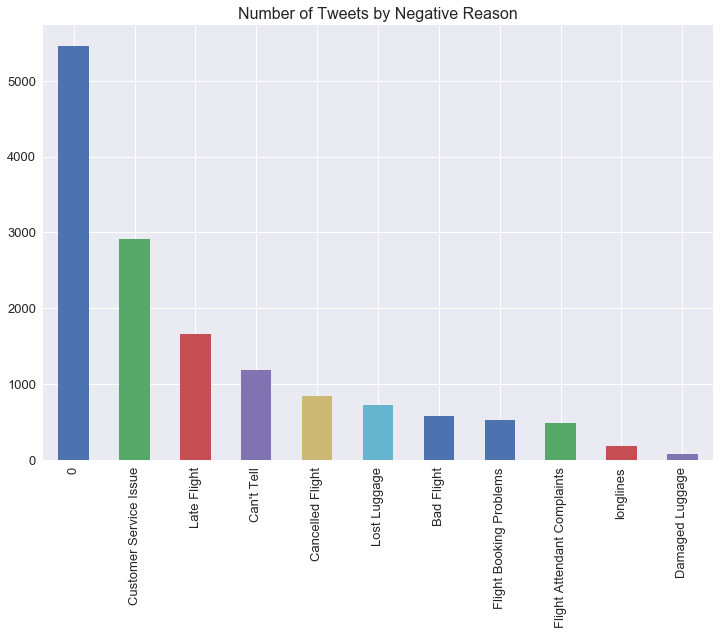

In [14]:
# Plotting By Negative Reason

negative_reason_counts = df2['Negative_Reason'].value_counts()

negative_reason_counts.plot(kind = 'bar',figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Negative Reason', fontsize=16)

In [15]:
sentiment_groups = df2.groupby('Sentiment')
sentiment_groups.Airline.value_counts()

Sentiment  Airline       
negative   United            2633
           US Airways        2263
           American          1960
           Southwest         1186
           Delta              955
           Virgin America     181
neutral    Delta              723
           United             697
           Southwest          664
           American           463
           US Airways         381
           Virgin America     171
positive   Southwest          570
           Delta              544
           United             492
           American           336
           US Airways         269
           Virgin America     152
Name: Airline, dtype: int64

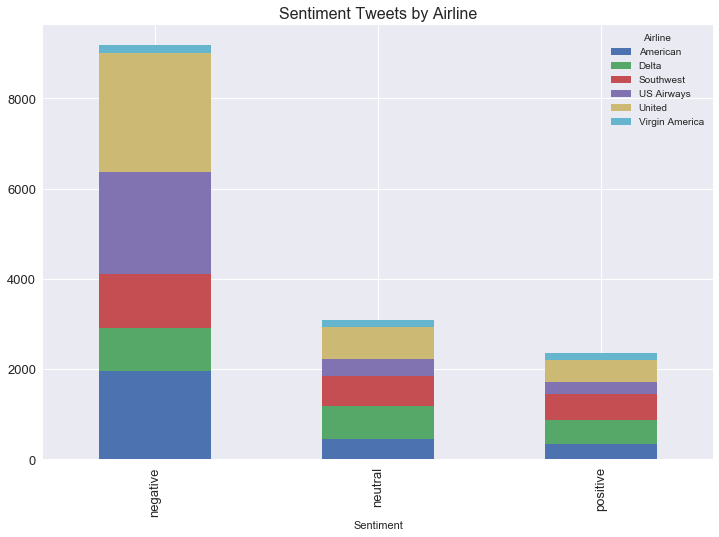

In [16]:
# Plotting Sentiment by Airline

sentiment_airline = df2.groupby(['Sentiment','Airline'])['Sentiment'].count().unstack('Airline').fillna(0)
sentiment_airline.plot(kind = 'bar', figsize=(12,8), fontsize=13, stacked=True)

plt.title('Sentiment Tweets by Airline', fontsize=16)

We can see here that the airline with the most negative tweets is United, the airline with the most positive tweets is Southwest, and the airline with the most neutral tweets is Delta 

In [17]:
airline_groups = df2.groupby('Airline')
airline_groups.Sentiment.value_counts()

Airline         Sentiment
American        negative     1960
                neutral       463
                positive      336
Delta           negative      955
                neutral       723
                positive      544
Southwest       negative     1186
                neutral       664
                positive      570
US Airways      negative     2263
                neutral       381
                positive      269
United          negative     2633
                neutral       697
                positive      492
Virgin America  negative      181
                neutral       171
                positive      152
Name: Sentiment, dtype: int64

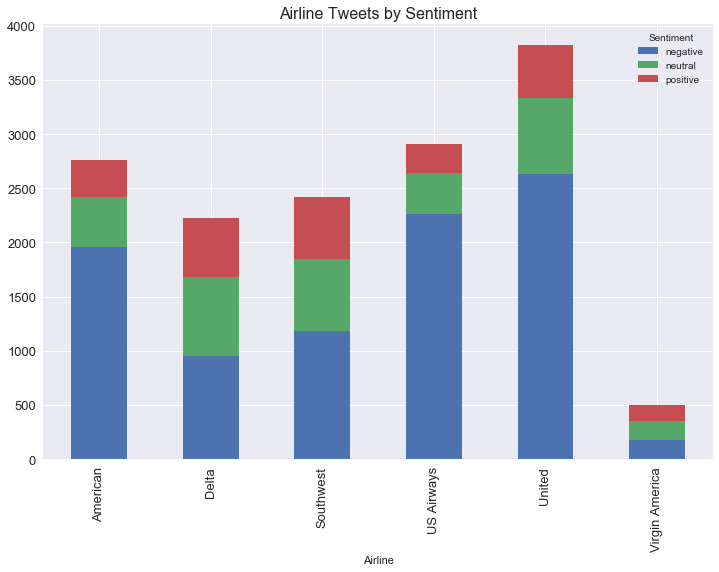

In [18]:
# Plotting Airline by Sentiment

sentiment_airline = df2.groupby(['Airline','Sentiment'])['Airline'].count().unstack('Sentiment').fillna(0)
sentiment_airline.plot(kind = 'bar', figsize=(12,8), fontsize=13, stacked=True)

plt.title('Airline Tweets by Sentiment', fontsize=16)

We can see here that all of the airlines except for Virgin Atlantic have a significantly larger number of negative tweets than neutral or positive tweets. Virgin Atlantic seems to have an equal ratio of all three sentiment types.

In [19]:
df_report = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/Airline_Confusion_Matrix.csv')
df_report.head()

,Sentiment,American,Delta,Southwest,US Airways,United,Virgin America
0,negative,1960,955,1186,2263,2633,181
1,neutral,463,723,664,381,697,171
2,positive,336,544,570,269,492,152


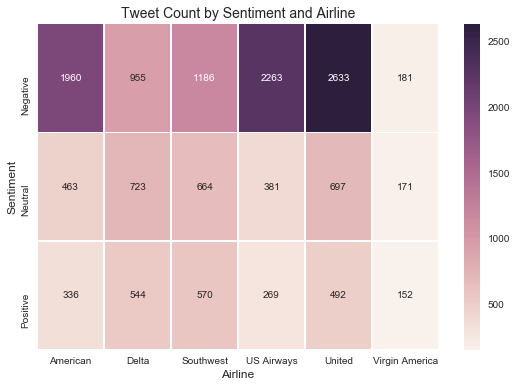

In [20]:
f, ax = plt.subplots(figsize=(9, 6))
yticks = ['Negative','Neutral','Positive']

sns.heatmap(df_report[['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']], annot=True, \
            fmt="d", linewidths=.5, ax=ax, yticklabels=yticks)
plt.title('Tweet Count by Sentiment and Airline', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

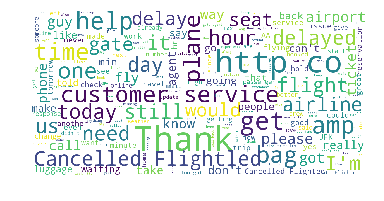

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

airline_names = ['American','Delta','Southwest','US Airways','United','VirginAmerica','Virgin America','AmericanAir',\
                 'SouthwestAir','USAirway','USAirways','JetBlue','flight']
stoplist = stopwords.words('english') + airline_names

wordcloud = WordCloud(
        background_color='white',
        stopwords=stoplist,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(df2['Text']))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud shows that the most frequently occuring words and phrases are 'cancelled flight', 'thank' (probably in context of thank you), and 'customer service'

#### III. NLP Cleaning Work and Sentiment Analysis

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import re
import string

In [23]:
df_text = df2[['Sentiment','Airline','Text']]
pd.set_option('display.max_colwidth', -1)

In [24]:
df_text.head()

,Sentiment,Airline,Text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it


In [25]:
stoplist = stopwords.words('english')
WordNet_Lemmatizer = WordNetLemmatizer()

def cleaner(text):
    letters = re.sub("[^a-zA-Z]", " ",text) 
    tokenizer = nltk.word_tokenize(letters)[2:]
    lower_case = [l.lower() for l in tokenizer]
    new_text = list(filter(lambda l: l not in stoplist, lower_case))
    lemmatizer = [WordNet_Lemmatizer.lemmatize(t) for t in new_text]
    return lemmatizer

def cleaner2(text):
    words = text.split() 
    clean_words = [word for word in words if (word not in stoplist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)

df_text['Clean_Text'] = df_text.Text.apply(cleaner2).apply(remove_mentions)
df_text['Cleaner_Text'] = df_text.Text.apply(cleaner)
df_text.head()

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sentiment,Airline,Text,Clean_Text,Cleaner_Text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said.,"[dhepburn, said]"
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you've added commercials experience... tacky.,"[added, commercial, experience, tacky]"
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,didn't today... Must mean need take another trip!,"[today, must, mean, need, take, another, trip]"
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it's really aggressive blast obnoxious ""entertainment"" guests' faces &amp; little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,it's really big bad thing,"[really, big, bad, thing]"


In [26]:
def sentiment_analysis(x):
    string = ''.join(x)
    blob = TextBlob(string).sentiment
    return blob

df_text['Sentiment_Analysis'] = df_text['Cleaner_Text'].apply(sentiment_analysis)
df_text.head()

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sentiment,Airline,Text,Clean_Text,Cleaner_Text,Sentiment_Analysis
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said.,"[dhepburn, said]","(0.0, 0.0)"
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you've added commercials experience... tacky.,"[added, commercial, experience, tacky]","(0.0, 0.0)"
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!,didn't today... Must mean need take another trip!,"[today, must, mean, need, take, another, trip]","(0.0, 0.0)"
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it's really aggressive blast obnoxious ""entertainment"" guests' faces &amp; little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]","(0.0, 0.0)"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it,it's really big bad thing,"[really, big, bad, thing]","(0.0, 0.0)"


In [27]:
df_text.Sentiment_Analysis.value_counts()

(0.0, 0.0)                           14548
(0.2, 0.2)                           42   
(0.35, 0.65)                         5    
(0.0, 0.1)                           4    
(-1.0, 1.0)                          4    
(0.0, 1.0)                           4    
(0.7, 0.6)                           2    
(0.5, 0.6)                           2    
(0.285714285714, 0.535714285714)     2    
(0.1, 1.0)                           1    
(0.433333333333, 0.833333333333)     1    
(0.2, 0.9)                           1    
(0.4, 0.4)                           1    
(-0.6, 1.0)                          1    
(0.1, 0.9)                           1    
(-0.3125, 0.6875)                    1    
(-0.714285714286, 0.857142857143)    1    
(-0.7, 0.666666666667)               1    
(0.214285714286, 0.571428571429)     1    
(0.5, 0.888888888889)                1    
(-0.3, 0.6)                          1    
(0.1, 0.3)                           1    
(0.7, 0.9)                           1    
(0.6, 0.9) 

Interesting here that a majority of the dataset is not showing any significant sentiment or polarity

#### IV. Clustering

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [29]:
vectorizer = TfidfVectorizer(stop_words="english")
model = vectorizer.fit_transform(df_text['Text'])

model.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
k_means = KMeans(n_clusters=3, random_state=1234, init='k-means++', max_iter=100, n_init=1)
k_means.fit(model)
y = k_means.predict(model)

In [31]:
print("Top terms per cluster:")
order_centroids = k_means.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  usairways  jetblue  southwestair  flight  thanks  http  virginamerica  thank  just  hold
Cluster 1:  americanair  flight  cancelled  thanks  help  aa  service  flightled  hours  thank
Cluster 2:  united  flight  thanks  thank  service  just  customer  time  bag  plane


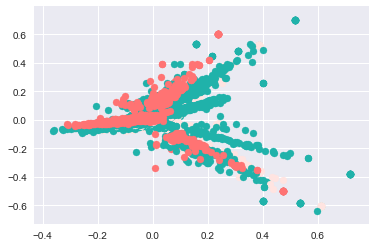

In [32]:
pca_num_components = 2
tsne_num_components = 2

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}

X = model.todense()

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[y[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [ ]:
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()